
# Ayudantía 7: Análisis Exploratorio de Datos (EDA)

**IMT2200 — Introducción a la Ciencia de Datos**

**Objetivo:** practicar un flujo completo de EDA: revisión de calidad, estadísticas descriptivas, visualización, agrupaciones y *wrangling* (merge/concat/groupby/explode).

## Introducción al Análisis Exploratorio de Datos (EDA)

El **Análisis Exploratorio de Datos (EDA)** es la primera etapa del trabajo con datos, cuyo objetivo es **comprender, diagnosticar y preparar** un conjunto de datos antes de aplicar modelos o análisis más avanzados. Se centra en **explorar la estructura, la calidad y los patrones** de los datos para generar intuiciones y detectar posibles problemas.

> Es como cuando recibes una caja con piezas desordenadas. El EDA es abrirla, mirar qué piezas hay, cuántas están dañadas, cómo se relacionan, y qué forma podrían tener al armarse. Aún no estás construyendo el modelo final, solo conociendo el material.

En la práctica, el EDA combina tres grandes ejes:

1. **Diagnóstico de calidad**  
   - Identificación de valores faltantes, inconsistencias, duplicados y outliers.  
   - Revisión de tipos de datos y verificación de reglas (ej. edades negativas, fechas fuera de rango).  

2. **Estadísticas descriptivas y visualización**  
   - Medidas de tendencia central, dispersión y distribución.  
   - Gráficos como histogramas, boxplots, conteos de categorías, correlaciones y diagramas de dispersión.  

3. **Wrangling y organización de la información**  
   - Transformación y limpieza (casteo de tipos, imputación, normalización).  
   - Operaciones con `pandas` clave: `merge`, `concat`, `groupby`, `pivot_table` y `explode`.  
   - Generación de nuevas variables (*feature engineering*), discretizaciones y categorizaciones.  

El EDA no busca probar hipótesis formales, sino **explorar sin imponer modelos previos**, generando preguntas, hipótesis preliminares y decisiones prácticas sobre la preparación de datos. Tal como se vio en clases, es una etapa iterativa y fundamental en todo proyecto de ciencia de datos.

## Preguntas

Chequear metadata y estructura general de los datos:

- ¿ Qué información tenemos de la data/variables antes de leerlos archivos?
- ¿Qué columnas / tipos de datos vemos al leerlos datos en un DataFrame (df)?

Chequear primeras y últimas filas:

- ¿Hay filas vacías/corruptas?
- ¿Conviene ordenarlos datos de alguna forma especial? Ej: fechas

Conteos generales:

- Nº de filas, Nº columnas, Nº valores nulos, Nº categorías, Nº valores únicos.
- Estadísticas descriptivas: rangos de valores, totales, medias, dispersiones, correlaciones, etc.

Validar con fuentes externas.
- ¿Hay valores extraños, faltan datos?

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = sns.load_dataset('titanic')

# Creamos un archivo .csv con el dataset
df.to_csv('titanic.csv', index=False)


## Datasets para practicar

[Seaborn_Datasets](https://github.com/mwaskom/seaborn-data)

[Kaggle](https://www.kaggle.com/datasets)

# Dataframe – Titanic

| Columna      | Descripción |
|--------------|-------------|
| `survived`   | 0 = no sobrevivió, 1 = sobrevivió. |
| `pclass`     | Clase del pasajero: 1 = primera, 2 = segunda, 3 = tercera. |
| `sex`        | Sexo del pasajero: male/female. |
| `age`        | Edad en años (float, con valores nulos). |
| `sibsp`      | Número de hermanos/esposos a bordo. |
| `parch`      | Número de padres/hijos a bordo. |
| `fare`       | Tarifa del pasaje (float). |
| `embarked`   | Puerto de embarque: C = Cherbourg, Q = Queenstown, S = Southampton. |
| `class`      | Clase del pasajero en formato categórico (equivalente a `pclass`). |
| `who`        | Clasificación: man, woman, child. |
| `adult_male` | Booleano: True si el pasajero es hombre adulto. |
| `deck`       | Letra de la cubierta de la cabina (muchos nulos). |
| `embark_town`| Nombre del puerto de embarque (Cherbourg, Queenstown, Southampton). |
| `alive`      | “yes” si sobrevivió, “no” en caso contrario. |
| `alone`      | Booleano: True si el pasajero viajaba solo (sin familia a bordo). |


<!-- ### Nota
Además, se sembraron:  
- 60 valores faltantes en `age`.  
- 10 valores faltantes en `fare`.  
- 4 outliers irreales en `age`.   -->


## 1) Carga de datos

In [4]:
# Cargar dataset

df = pd.read_csv("titanic.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## 2) Diagnóstico

In [6]:

display(df.head())
df.info()
df.describe(include='all').T


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Estadísticas de resumen


- **Media** (`np.mean()`): es la suma de todos los valores, dividida por el número de puntos.

$$\mu=\frac{1}{n} \sum_{i=1}^n x_i $$

- **Mediana** (`np.median()`): es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers. Para calcularla, se ordenan los datos y se elige el valor que queda en la mitad.

- **Percentiles** (`np.percentile()`): el percentil $p$, corresponde al valor que es mayor al $p\%$ de los datos.


- **Varianza** (`np.var()`): promedio de la distancia cuadrática de los datos a la media. Es una medida de la dispersión de los datos.

$$\rm{Var}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2$$

- **Desviación estándar** (`np.std()`): es la raíz cuadrada de la varianza. Está en la misma escala de unidades que los datos.

$$\sigma=\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}$$

- **Covarianza** (`np.cov()`): es una medida de cómo dos cantidades varían juntas.
Es la media del producto entre las diferencias de los valores respecto a la media.

$$\rm{Cov} (x,y)=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

- **Coeficiente de correlación de Pearson** (`np.corrcoef`): para tener una medida más general y aplicable de la correlación entre dos variables, necesitamos que sea adimensional. Por lo tanto dividimos la covarianza por las desviaciones estándar de $x$ e $y$. Esto define el coeficiente de correlación de Pearson ($\rho$).

$$\rho=\frac{\rm{Cov} (x,y)}{\sigma_x \sigma_y}$$


**Fuente: Jupyter Notebook Clase 16 IMT2200 2022-2**

## 3) Calidad de datos: nulos, duplicados y reglas

In [7]:

# Análisis de valores nulos
nulos = df.isna().sum().sort_values(ascending=False)
porc_nulos = (df.isna().mean()*100).round(2)
display(pd.DataFrame({"nulos": nulos, "%": porc_nulos}).T)
# .T transpone el DataFrame, intercambiando filas y columnas para facilitar la visualización.

,adult_male,age,alive,alone,class,deck,embark_town,embarked,fare,parch,pclass,sex,sibsp,survived,who
nulos,0.0,177.00,0.0,0.0,0.0,688.00,2.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%,0.0,19.87,0.0,0.0,0.0,77.22,0.22,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print("Duplicados exactos:", df.duplicated().sum())

Duplicados exactos: 107


**Limpieza edades**

In [9]:
# Regla: edad válida entre 0 y 100
df = df[df['age'].notna() & ((df['age'] > 0) & (df['age'] <= 100))]

**Imputación simple**

In [10]:

# Imputación simple: mediana para numéricos, 'Desconocido' para categóricos
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna("Desconocido")

df.isna().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## 4) Univariado: histogramas y boxplots

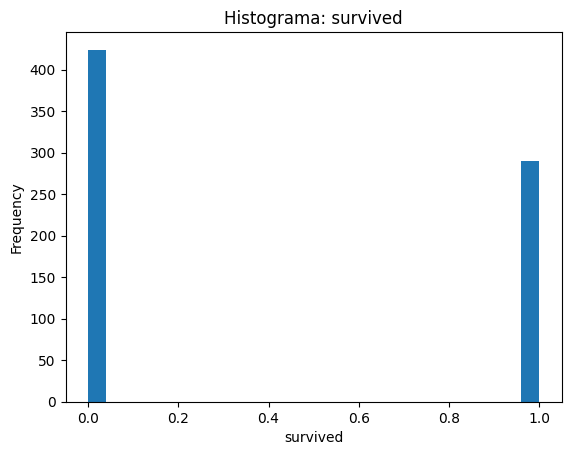

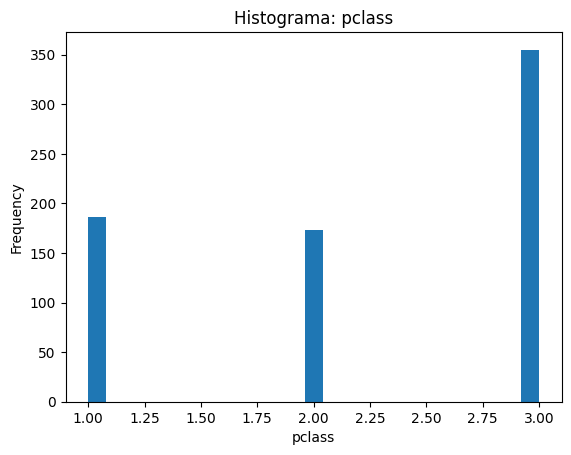

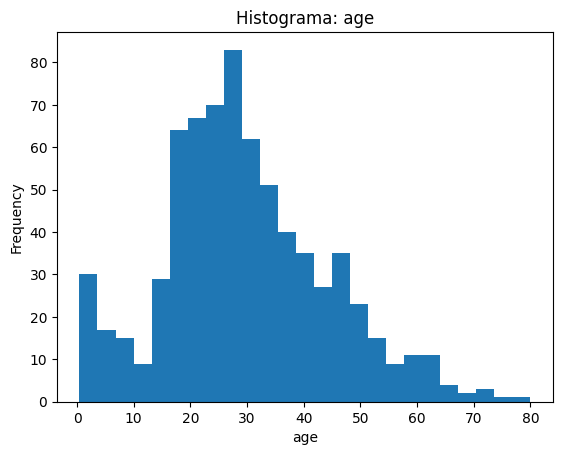

In [11]:

num_cols = df.select_dtypes(include='number').columns.tolist() # Seleccionar columnas numéricas
cat_cols = df.select_dtypes(include='object').columns.tolist() # Seleccionar columnas categ

for c in num_cols[:3]:
    plt.figure()
    df[c].plot(kind='hist', bins=25) # Bin=25 para más detalle
    plt.title(f'Histograma: {c}')
    plt.xlabel(c)
    plt.show()


C:\Users\djop4\AppData\Local\Temp\ipykernel_11492\3656321457.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[c] for c in num_cols], vert=True, labels=num_cols, showfliers=True)


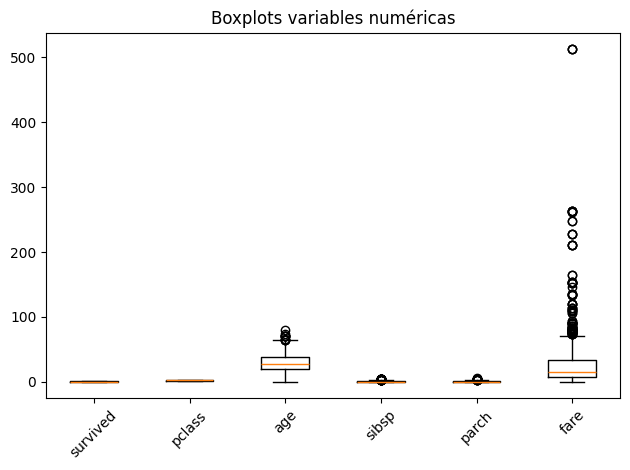

In [12]:
plt.figure()
plt.boxplot([df[c] for c in num_cols], vert=True, labels=num_cols, showfliers=True) 
# showfliers=True para mostrar outliers
plt.title('Boxplots variables numéricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Detección de outliers (IQR)**

In [13]:

def outlier_mask_iqr(s, k=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1 # Rango intercuartílico
    low, high = q1 - k*iqr, q3 + k*iqr # Límites
    return (s < low) | (s > high)

out_counts = {c: outlier_mask_iqr(df[c]).sum() for c in num_cols} # Contar outliers por columna
pd.Series(out_counts).sort_values(ascending=False) # Mostrar conteos ordenados


fare        94
sibsp       35
parch       15
age         11
pclass       0
survived     0
dtype: int64

+ Utilizamos el método IQR para detectar outliers en variables numéricas y contamos cuántos hay en cada variable.
+ También podríamos usar z-score, pero IQR es más robusto a distribuciones no normales.
+ Esta método también se usa para eliminar los outliers si es necesario.
+ Aquí solo contamos, no eliminamos.

**Detección de outliers Grafico de puntos**

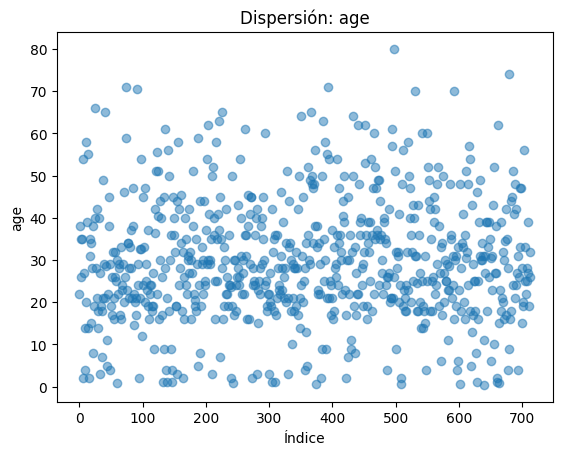

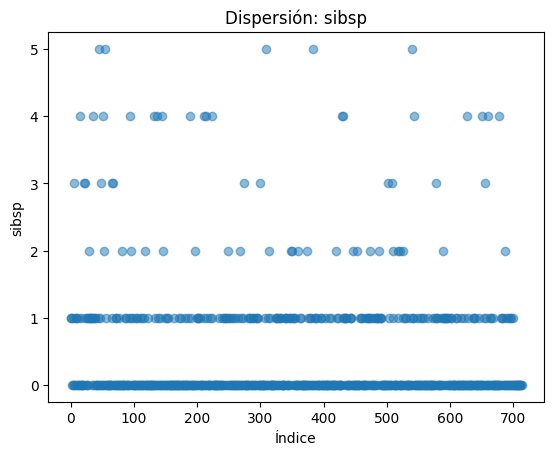

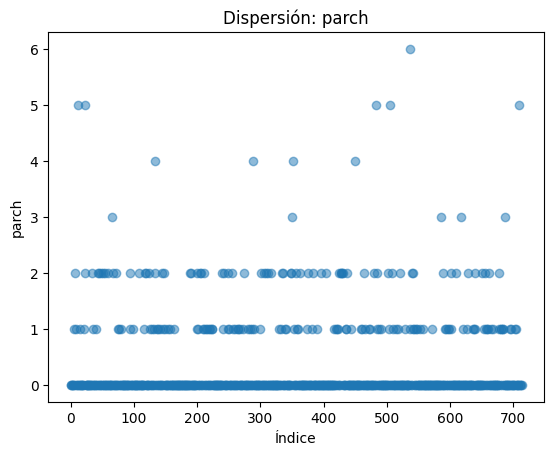

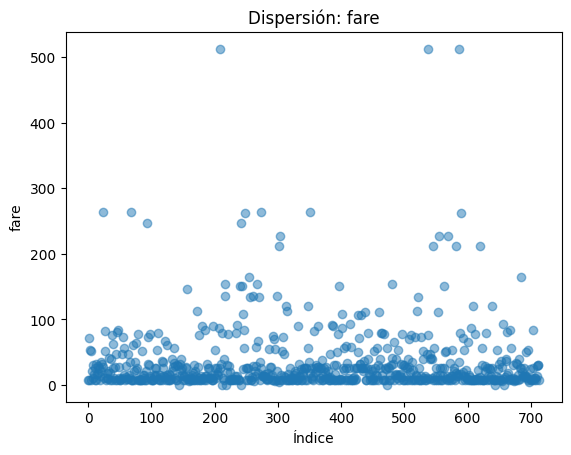

In [14]:
## Detección de outliers Grafico de puntos
for c in num_cols[2:]:
    plt.figure()
    plt.scatter(x=np.arange(len(df)), y=df[c], alpha=0.5) # alpha para transparencia
    plt.title(f'Dispersión: {c}')
    plt.xlabel('Índice')
    plt.ylabel(c)
    plt.show()

## 5) Bivariado: correlación y scatter

<Axes: >

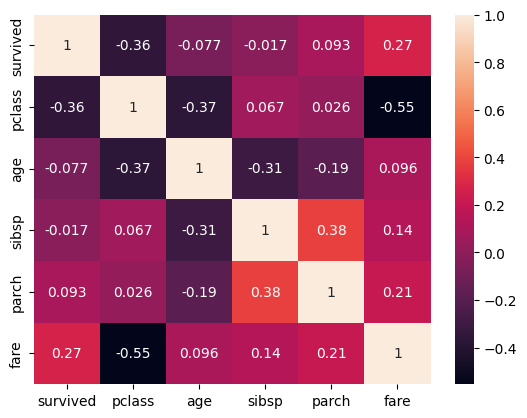

In [15]:
sns.heatmap(df[num_cols].corr(), annot=True)

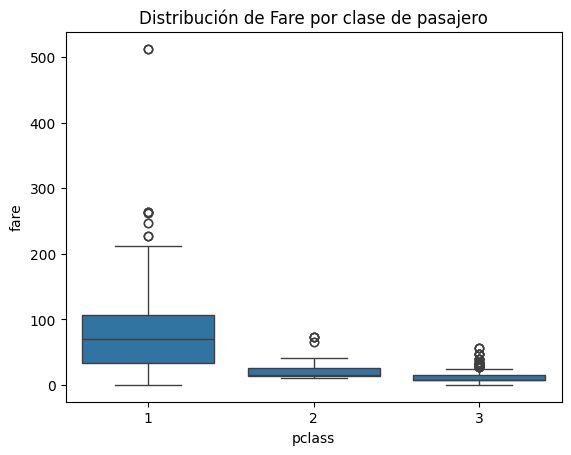

In [16]:
sns.boxplot(x="pclass", y="fare", data=df)
plt.title("Distribución de Fare por clase de pasajero")
plt.show()

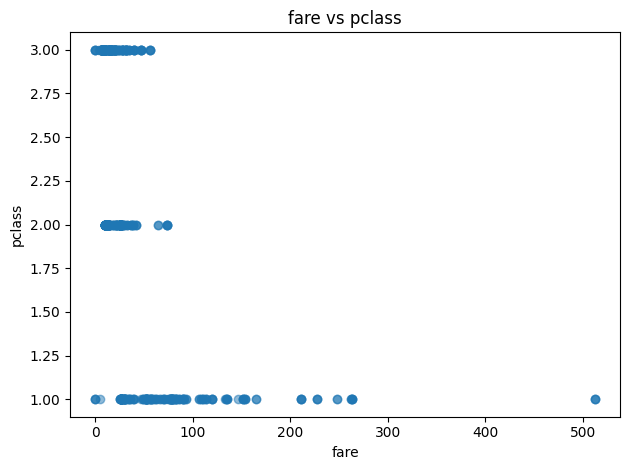

In [17]:
x, y = 'fare','pclass'
plt.figure()
plt.scatter(df[x], df[y], alpha=0.5)
plt.xlabel(x); plt.ylabel(y); plt.title(f'{x} vs {y}')
plt.tight_layout(); plt.show()

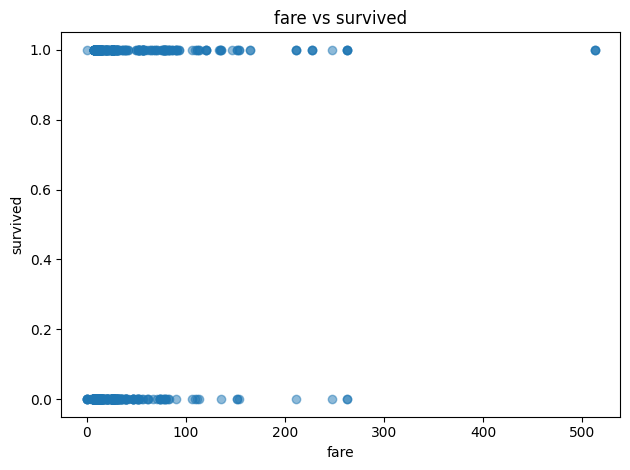

In [18]:
x, y = 'fare','survived'
plt.figure()
plt.scatter(df[x], df[y], alpha=0.5)
plt.xlabel(x); plt.ylabel(y); plt.title(f'{x} vs {y}')
plt.tight_layout(); plt.show()

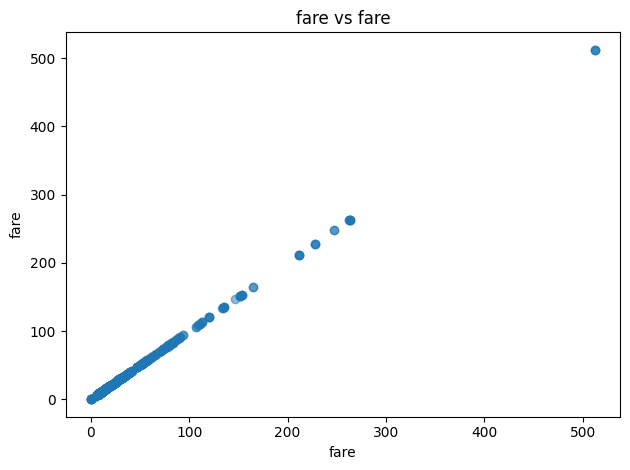

In [19]:
x, y = 'fare','fare'
plt.figure()
plt.scatter(df[x], df[y], alpha=0.5)
plt.xlabel(x); plt.ylabel(y); plt.title(f'{x} vs {y}')
plt.tight_layout(); plt.show()

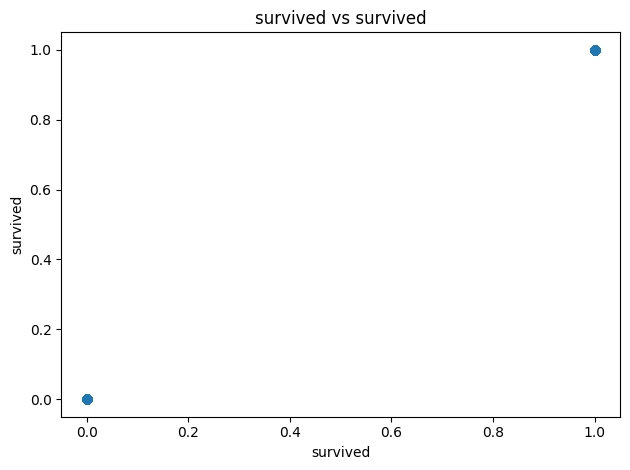

In [20]:
x, y = 'survived','survived'
plt.figure()
plt.scatter(df[x], df[y], alpha=0.5)
plt.xlabel(x); plt.ylabel(y); plt.title(f'{x} vs {y}')
plt.tight_layout(); plt.show()

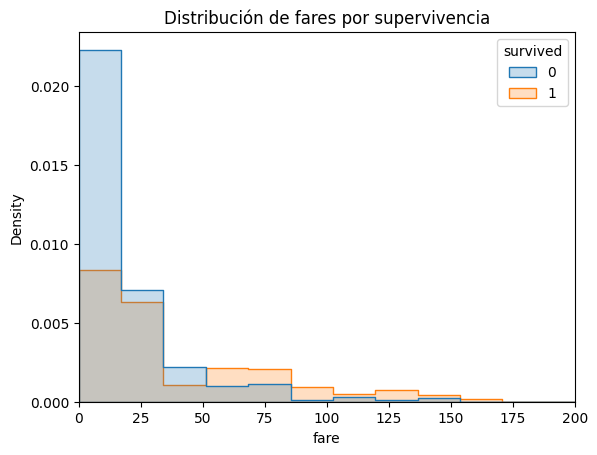

In [21]:
sns.histplot(data=df, x="fare", hue="survived", bins=30, kde=False, element="step", stat="density")
plt.xlim(0,200)   # recorta para ver mejor (los outliers distorsionan)
plt.title("Distribución de fares por supervivencia")
plt.show()

## 6) Agrupaciones: `groupby`, `pivot_table`, `crosstab`

In [22]:

g = (df.groupby('sex').agg(tasa=('survived', 'mean'), n =('survived', 'size')).reset_index())
# Hacemos un groupby por sexo, calculando la tasa de supervivencia y el conteo total
display(g)

pv = pd.pivot_table(df, index='pclass', columns='sex', values='survived', aggfunc='mean')
# Tabla pivote de tasa de supervivencia por clase y sexo
# Una tabla pivote (pivot table) es una herramienta que permite reorganizar, resumir y calcular estadísticas de los datos agrupados por una o más variables.
# En pandas, pivot_table permite calcular agregaciones (como medias, conteos, sumas) cruzando variables categóricas en filas y columnas, facilitando el análisis comparativo.
display(pv)

ct = pd.crosstab(df['pclass'], df['sex'], margins=True, normalize='index') # normalizar: lo transforma en proporciones # margins=True agrega totales
# Tabla de contingencia (crosstab) de conteos y proporciones por clase y sexo
# Una tabla de contingencia (crosstab) es una herramienta que muestra la frecuencia (conteo) de ocurrencias de combinaciones de dos o más variables categóricas.
# En pandas, crosstab permite crear estas tablas de frecuencia cruzando variables, facilitando el análisis de relaciones y distribuciones conjuntas.
display(ct.round(3))


,sex,tasa,n
0,female,0.754789,261
1,male,0.205298,453


sex,female,male
pclass,,
1,0.964706,0.396040
2,0.918919,0.151515
3,0.460784,0.150198


sex,female,male
pclass,,
1,0.457,0.543
2,0.428,0.572
3,0.287,0.713
All,0.366,0.634


## 7) Ingeniería de atributos

In [23]:
df['age_bucket'] = pd.cut(df['age'], bins=[0,12,18,30,45,60,200], labels=['niñez','adolec','joven','adulto-j','adulto','senior'], right=False)
display(df[['age','age_bucket']].head())
# Cut crea categorías (bins) a partir de una variable numérica continua.
# Aquí, 'age' se divide en rangos de edad con etiquetas descriptivas.
# 'age_bucket' es una nueva columna que indica el rango de edad al que pertenece cada pasajero.


df['fare_per_class'] = df['fare'] / df['pclass']
display(df[['fare','pclass','fare_per_class']].head())
# fare_per_class es una nueva columna que indica la tarifa ajustada por la clase del pasajero.
# Esto puede ayudar a entender mejor el costo relativo del pasaje según la clase.


,age,age_bucket
0,22.0,joven
1,38.0,adulto-j
2,26.0,joven
3,35.0,adulto-j
4,35.0,adulto-j


,fare,pclass,fare_per_class
0,7.2500,3,2.416667
1,71.2833,1,71.283300
2,7.9250,3,2.641667
3,53.1000,1,53.100000
4,8.0500,3,2.683333



## 9) Mini‑desafíos

1. **Faltantes**: calcula el % de nulos por columna y grafícalo con barras.
2. **Distribuciones**: grafica en el mismo eje los histogramas de `age` por `sex` (normaliza por área).
3. **Agrupación**: tasa de `survived` por `pclass` y `sex`, ordenada de mayor a menor.
4. **Outliers**: elimina outliers IQR en `fare` y compara media/mediana antes vs después.
5. **Wrangling**: crea un `DataFrame` con columnas `id` y `tags` (listas) y usa `explode` para contar frecuencia de cada tag.


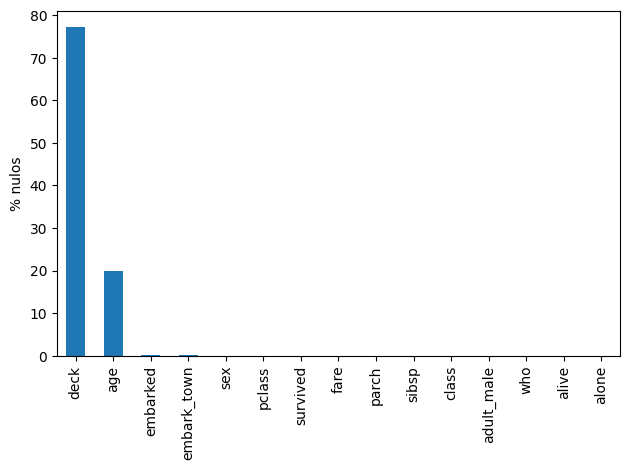

In [ ]:
# 1. Análisis de valores nulos

df = pd.read_csv("titanic.csv")
pct = (df.isna().mean()*100).sort_values(ascending=False)
pct.plot(kind='bar')
plt.ylabel('% nulos')
plt.tight_layout()

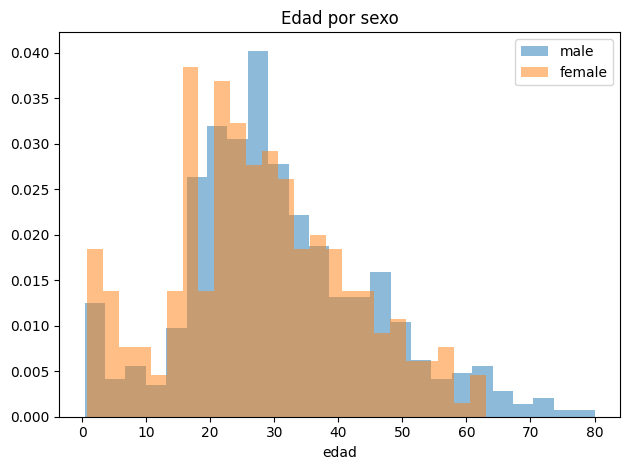

In [ ]:
# 2) Edad por sexo
for s in df['sex'].unique(): # Iterar sobre valores únicos en la columna 'sex' -> "male" y "female"
    sub = df.loc[df['sex']==s, 'age'].dropna()
    plt.hist(sub, bins=25, density=True, alpha=0.5, label=str(s))
plt.legend() # Añadir leyenda para identificar los sexos
plt.title('Edad por sexo') # Título del gráfico
plt.xlabel('edad') # Etiqueta del eje x
plt.tight_layout()
plt.show()

In [ ]:
# 3) Tasa survived por pclass x sex
tasa = (df.groupby(['pclass','sex'])['survived'].mean() # Promedio de supervivencia por clase y sexo
            .sort_values(ascending=False).reset_index(name='tasa')) # Reiniciar índice y nombrar columna de tasa
display(tasa)

,pclass,sex,tasa
0,1,female,0.968085
1,2,female,0.921053
2,3,female,0.500000
3,1,male,0.368852
4,2,male,0.157407
5,3,male,0.135447


In [ ]:
# 4) Outliers en fare (IQR)
def outlier_mask_iqr(s, k=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - k*iqr, q3 + k*iqr
    return (s < low) | (s > high)

outlier_mask = outlier_mask_iqr(df['fare'])
base_stats = df['fare'].agg(['mean', 'median'])
# Eliminar outliers
df_sin_outliers = df.loc[~outlier_mask] # ~ invierte la máscara booleana
new_stats = df_sin_outliers['fare'].agg(['mean', 'median'])

display(pd.DataFrame({'antes': base_stats, 'despues': new_stats}))



,antes,despues
mean,32.204208,17.822091
median,14.454200,13.000000


In [42]:
# 5) Explode + conteo
tags = pd.DataFrame({'id':[1,2,3,4],
                     'tags':[['py','eda'], ['sql','pandas','eda'], [], ['py','viz']]})


tags

,id,tags
0,1,"[py, eda]"
1,2,"[sql, pandas, eda]"
2,3,[]
3,4,"[py, viz]"


In [43]:
tags_ex = tags.assign(tags=tags['tags'].apply(lambda x: x if isinstance(x,list) else [])).explode('tags')
conteo = tags_ex['tags'].value_counts()
display(conteo)

tags
py        2
eda       2
sql       1
pandas    1
viz       1
Name: count, dtype: int64